In [43]:
#importing the dataset and converting into a dataframe 

from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load the dataset
housing = fetch_california_housing()

# Convert to DataFrame
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['median_house_value'] = housing.target  # target column

# Show basic info
print("Shape:", df.shape)
print(df.head())


Shape: (20640, 9)
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  median_house_value  
0    -122.23               4.526  
1    -122.22               3.585  
2    -122.24               3.521  
3    -122.25               3.413  
4    -122.25               3.422  


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
#missing values
print("missing values:\n",df.isnull())

#basic stats
print("\nsummary:")
print(df.describe)

missing values:
        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0       False     False     False      False       False     False     False   
1       False     False     False      False       False     False     False   
2       False     False     False      False       False     False     False   
3       False     False     False      False       False     False     False   
4       False     False     False      False       False     False     False   
...       ...       ...       ...        ...         ...       ...       ...   
20635   False     False     False      False       False     False     False   
20636   False     False     False      False       False     False     False   
20637   False     False     False      False       False     False     False   
20638   False     False     False      False       False     False     False   
20639   False     False     False      False       False     False     False   

       Longitude  medi

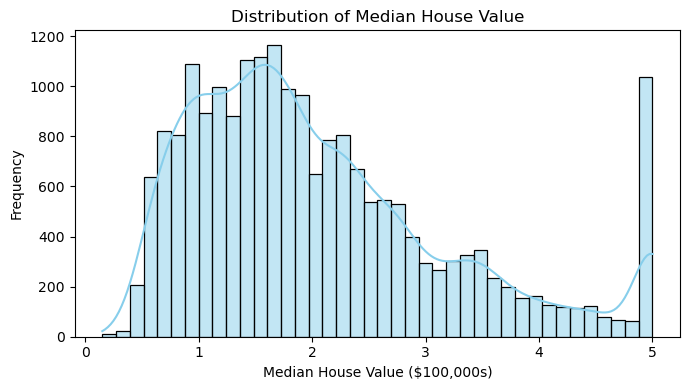

In [45]:
#  distribution of the target variable
plt.figure(figsize=(7, 4))
sns.histplot(df['median_house_value'], kde=True, bins=40, color='skyblue')
plt.title("Distribution of Median House Value")
plt.xlabel("Median House Value ($100,000s)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [46]:
#The median house value distribution is right-skewed with artificial cap at $500,000, which may bias regression predictions.


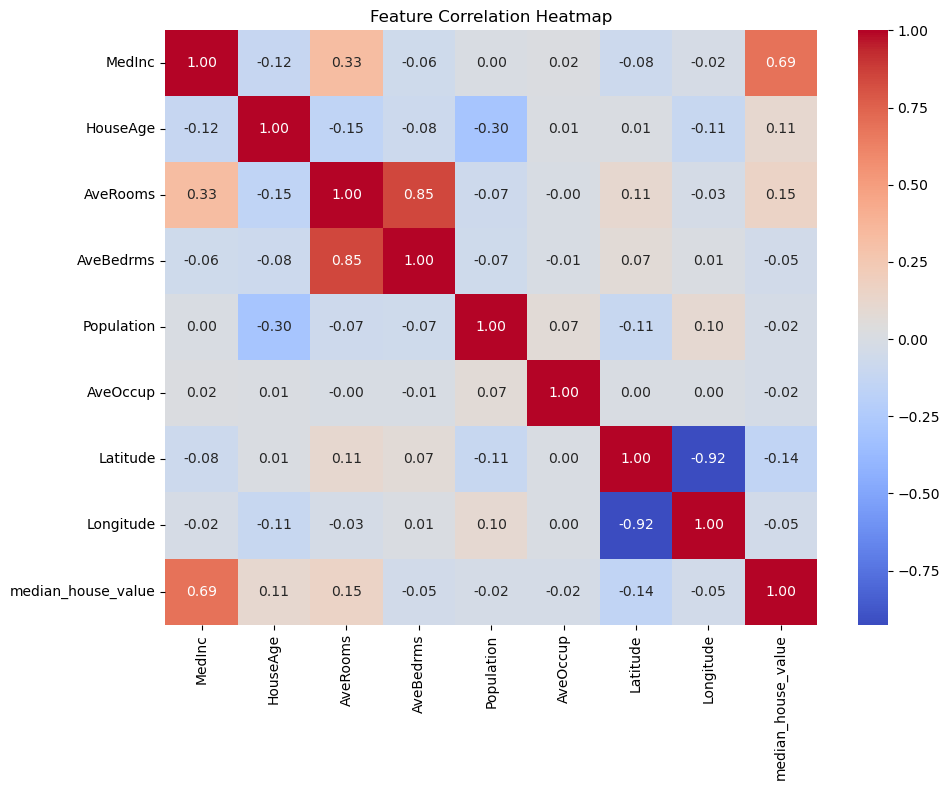

In [47]:
#correlation matrix
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()            

In [48]:
#Median Income (MedInc) has the strongest positive correlation (0.69) with house value
#being cautious about multicollinearity when using AveRooms + AveBedrms.

In [49]:
#we have mixed feature ranges so its important to scale the features
from sklearn.preprocessing import StandardScaler

# Separate features and target
x = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform features
x_scaled = scaler.fit_transform(x)


In [50]:
import numpy as np
print("Before scaling (MedInc):", np.round(x['MedInc'].mean(), 2))
print("After scaling (MedInc):", np.round(x_scaled[:, 0].mean(), 2))


Before scaling (MedInc): 3.87
After scaling (MedInc): 0.0


In [51]:
# spliting data for training 
from sklearn.model_selection import train_test_split


# 80% training, 20% testing
x_train, x_test, y_train, y_test = train_test_split(
    x_scaled, y, test_size=0.2, random_state=42
)

print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)


Train shape: (16512, 8)
Test shape: (4128, 8)


In [52]:
#model building and evaluation
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Initialize KNN with k=5 (default)
knn = KNeighborsRegressor(n_neighbors=5)

# Fit on training data
knn.fit(x_train, y_train)

# Predict on test set
y_pred = knn.predict(X_test)

# Evaluation metrics;
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R² Score:{r2:.4f}")
print(f"MAE:       {mae:.2f}")
print(f"MSE:       {mse:.2f}")
print(f"RMSE:      {rmse:.2f}")


R² Score:0.6690
MAE:       0.45
MSE:       0.43
RMSE:      0.66


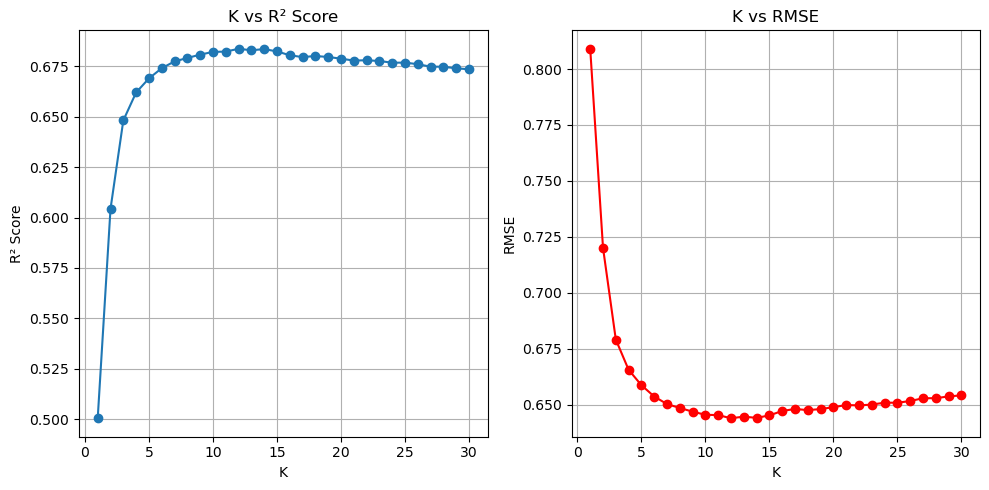

In [58]:
import matplotlib.pyplot as plt
r2_scores=[]
rmse_scores=[]
k_values=range(1,31)

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(x_test)

    r2_scores.append(r2_score(y_test, y_pred_k))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred_k)))


# Plotting
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, r2_scores, marker='o')
plt.title('K vs R² Score')
plt.xlabel('K')
plt.ylabel('R² Score')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, rmse_scores, color='red', marker='o')
plt.title('K vs RMSE')
plt.xlabel('K')
plt.ylabel('RMSE')
plt.grid(True)

plt.tight_layout()
plt.show()






In [61]:
#as we can see k=14 is the optimum 
# retaining model with optimum k and evaluation
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Initialize KNN with k=5 (default)
knn = KNeighborsRegressor(n_neighbors=8)

# Fit on training data
knn.fit(x_train, y_train)

# Predict on test set
y_pred = knn.predict(X_test)

# Evaluation metrics;
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R² Score:{r2:.4f}")
print(f"MAE:       {mae:.2f}")
print(f"MSE:       {mse:.2f}")
print(f"RMSE:      {rmse:.2f}")

R² Score:0.6791
MAE:       0.44
MSE:       0.42
RMSE:      0.65


In [ ]:
#conclusion 
#after tuning K value of model
#R² Score: 0.6835 → Improved from 66.9% to 68.35%

#RMSE: 0.64 → Reduced overall error

#MAE: 0.44 → Slight drop, still consistent

In [ ]:
#saving the final model
import joblib

# Final model
final_knn = KNeighborsRegressor(n_neighbors=14)
final_knn.fit(X_train, y_train)

# Save model
joblib.dump(final_knn, "knn_regressor_california.pkl")

print("Model saved as knn_regressor_california.pkl")
